This was our initial visualization and attempt at feature selection prior to using the classifier.

In [7]:
import pandas as pd
import numpy as np
import datetime as datetime
import time
import math
%matplotlib inline

from sklearn import preprocessing as prep
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

In [8]:
# df311 = pd.read_csv('311cleaned.csv')
# dfwx = pd.read_csv('311weather.csv')
# df = pd.merge(df311, dfwx,  left_on='REQUEST_ID', right_on='REQUEST_ID', how='left')  
# saved merged data to 311Master.csv to save time loading
df = pd.read_csv('311Trimmed.csv')

In [9]:
df.describe()

,REQUEST_ID,STATUS,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,X,Y,...,daily.temperatureMin,daily.temperatureMinTime,daily.time,daily.uvIndex,daily.uvIndexTime,daily.visibility,daily.windBearing,daily.windGust,daily.windGustTime,daily.windSpeed
count,49053.000000,49053.000000,49011.000000,48968.000000,4.905300e+04,48972.000000,48968.000000,48944.000000,49053.000000,49053.000000,...,49053.000000,4.905300e+04,4.905300e+04,49053.000000,4.905300e+04,49053.000000,49053.000000,49053.000000,4.905300e+04,49053.000000
mean,163513.001611,1.212709,4.899512,16.630514,4.200323e+10,3.017541,16.630514,3.594639,-79.972375,40.440576,...,48.206467,1.497976e+09,1.497940e+09,5.261880,1.497984e+09,9.372215,216.037857,9.282331,1.497988e+09,1.536793
std,23524.044702,0.714372,2.588338,7.928799,1.811924e+05,1.432719,7.928799,1.605899,0.045680,0.027736,...,15.380468,8.201116e+06,8.201604e+06,2.416298,8.201347e+06,0.871293,73.597253,4.524251,8.202974e+06,1.162985
min,123272.000000,0.000000,1.000000,0.000000,4.200301e+10,0.000000,0.000000,1.000000,-80.088105,40.362785,...,1.200000,1.483276e+09,1.483247e+09,1.000000,1.483290e+09,3.780000,0.000000,1.460000,1.483247e+09,0.020000
25%,143251.000000,1.000000,3.000000,11.000000,4.200311e+10,2.000000,11.000000,2.000000,-80.007706,40.420807,...,37.170000,1.491361e+09,1.491278e+09,3.000000,1.491322e+09,9.050000,188.000000,5.730000,1.491332e+09,0.710000
50%,163280.000000,1.000000,5.000000,16.000000,4.200318e+10,3.000000,16.000000,4.000000,-79.977534,40.445740,...,51.120000,1.497928e+09,1.497845e+09,5.000000,1.497895e+09,9.750000,224.000000,8.810000,1.497902e+09,1.310000
75%,183505.000000,1.000000,7.000000,22.000000,4.200329e+10,5.000000,22.000000,5.000000,-79.934882,40.462316,...,60.880000,1.504091e+09,1.504066e+09,7.000000,1.504109e+09,10.000000,267.000000,11.620000,1.504112e+09,2.110000
max,205290.000000,3.000000,9.000000,32.000000,4.200398e+10,6.000000,32.000000,6.000000,-79.866608,40.520177,...,73.950000,1.514722e+09,1.514696e+09,10.000000,1.514732e+09,10.000000,359.000000,26.100000,1.514696e+09,6.150000


In [10]:
df.fillna(0, inplace=True) #fill zero instances of weather
df = df.reset_index()

In [11]:
df.head()

,index,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,...,daily.temperatureMin,daily.temperatureMinTime,daily.time,daily.uvIndex,daily.uvIndexTime,daily.visibility,daily.windBearing,daily.windGust,daily.windGustTime,daily.windSpeed
0,0,205290,2017-12-31T23:17:00,Snow/Ice removal,Website,1,DPW - Street Maintenance,Marshall-Shadeland,1.0,27.0,...,1.99,1514721600,1514696400,1,1514732400,9.09,264,5.32,1514696400,0.57
1,1,205289,2017-12-31T22:01:00,Snow/Ice removal,Report2Gov iOS,1,DPW - Street Maintenance,Stanton Heights,9.0,10.0,...,1.57,1514721600,1514696400,1,1514732400,9.06,265,5.27,1514696400,0.51
2,2,205288,2017-12-31T21:55:00,Snow/Ice removal,Website,1,DPW - Street Maintenance,New Homestead,5.0,31.0,...,1.76,1514721600,1514696400,1,1514732400,9.06,257,5.38,1514696400,0.63
3,3,205287,2017-12-31T18:23:00,Missed Pick Up,Website,1,DPW - Refuse,Mount Washington,2.0,19.0,...,1.50,1514721600,1514696400,1,1514732400,9.09,262,5.35,1514696400,0.55
4,4,205286,2017-12-31T17:56:00,Snow/Ice removal,Report2Gov iOS,1,DPW - Street Maintenance,Stanton Heights,9.0,10.0,...,1.57,1514721600,1514696400,1,1514732400,9.06,265,5.27,1514696400,0.52


In [12]:
df.columns

Index(['index', 'REQUEST_ID', 'CREATED_ON', 'REQUEST_TYPE', 'REQUEST_ORIGIN',
       'STATUS', 'DEPARTMENT', 'NEIGHBORHOOD', 'COUNCIL_DISTRICT', 'WARD',
       'TRACT', 'PUBLIC_WORKS_DIVISION', 'PLI_DIVISION', 'POLICE_ZONE',
       'FIRE_ZONE', 'X', 'Y', 'GEO_ACCURACY', 'current.apparentTemperature',
       'current.cloudCover', 'current.dewPoint', 'current.humidity',
       'current.icon', 'current.precipIntensity', 'current.precipProbability',
       'current.precipType', 'current.pressure', 'current.summary',
       'current.temperature', 'current.time', 'current.uvIndex',
       'current.visibility', 'current.windBearing', 'current.windGust',
       'current.windSpeed', 'daily.apparentTemperatureHigh',
       'daily.apparentTemperatureHighTime', 'daily.apparentTemperatureLow',
       'daily.apparentTemperatureLowTime', 'daily.apparentTemperatureMax',
       'daily.apparentTemperatureMaxTime', 'daily.apparentTemperatureMin',
       'daily.apparentTemperatureMinTime', 'daily.cloudCov

In [13]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False) 

Potholes                                8689
Weeds/Debris                            7873
Building Maintenance                    4037
Abandoned Vehicle (parked on street)    2572
Litter                                  1886
Refuse Violations                       1802
Illegal Parking                         1770
Missed Pick Up                          1717
Replace/Repair a Sign                   1539
City Source (CDBG)                      1499
Street Light - Repair                   1422
Building Without a Permit               1348
Vacant Building                         1256
Paving Request                          1236
Overgrowth                              1209
Snow/Ice removal                        1033
Pruning (city tree)                     1020
Rodent control                           965
Need Potable Water                       845
Fire Safety System Not Working           818
Dead Animal                              787
Request New Sign                         781
Illegal Du

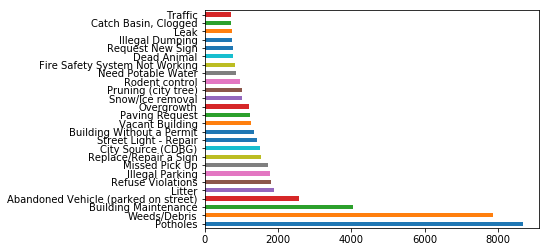

In [14]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False).plot.barh()

In [15]:
df['REQUEST_ORIGIN'].value_counts(sort=True, ascending=False, dropna=False)

Call Center           31426
Website                7770
Control Panel          6488
Report2Gov iOS         1448
Twitter                1072
Report2Gov Android      444
Text Message            392
Report2Gov Website        6
QAlert Mobile iOS         5
Email                     2
Name: REQUEST_ORIGIN, dtype: int64

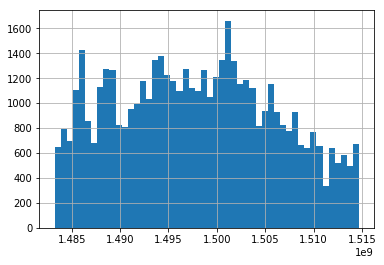

In [16]:
# visualizatins of various fields and weather events
# time is based off the unix timestamp, this graph covers the entire year
df['daily.time'].hist(bins=50)

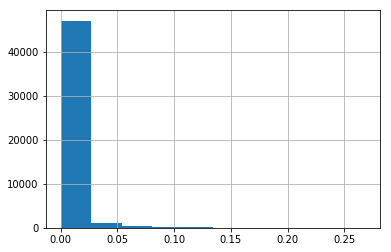

In [17]:
df['current.precipIntensity'].hist()

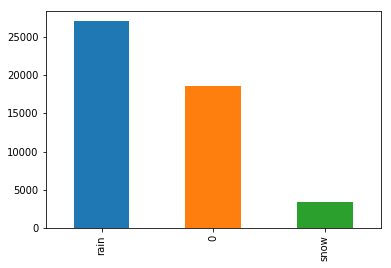

In [18]:
df['daily.precipType'].value_counts(sort=True, ascending=False, dropna=False).plot.bar()

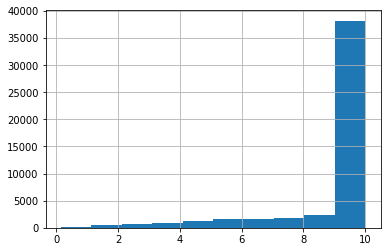

In [19]:
df['current.visibility'].hist(bins=10)

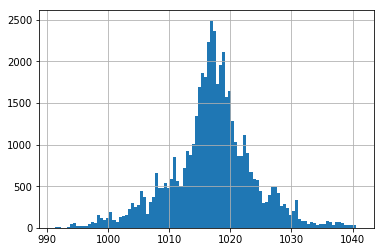

In [20]:
df['current.pressure'].hist(bins=100)

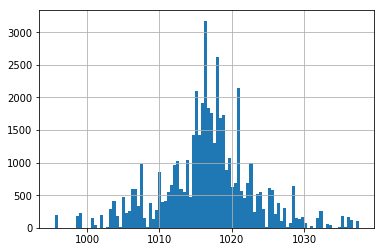

In [21]:
df['daily.pressure'].hist(bins=100)

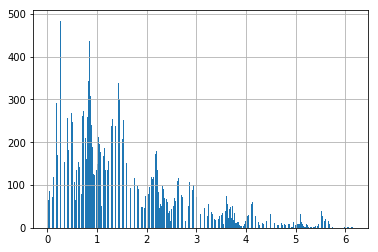

In [22]:
df['daily.windSpeed'].hist(bins=1000)

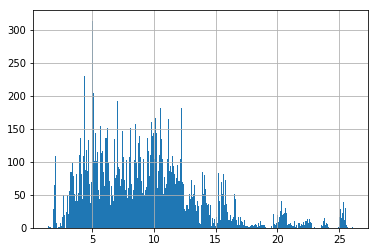

In [23]:
df['daily.windGust'].hist(bins=1000)

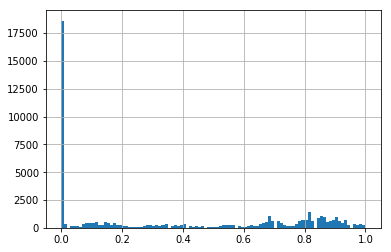

In [24]:
df['daily.precipProbability'].hist(bins=100)

In [25]:
df['current.summary'].value_counts(sort=True, ascending=False, dropna=False)

Clear                      16082
Overcast                   10435
Mostly Cloudy               8859
Partly Cloudy               6938
Light Rain                  2428
Drizzle                     2266
Rain                         635
Flurries                     546
Foggy                        487
Light Snow                   129
Humid and Mostly Cloudy       87
Humid and Partly Cloudy       62
Humid and Overcast            52
Light Sleet                   30
Humid                         11
Snow                           5
Heavy Rain                     1
Name: current.summary, dtype: int64

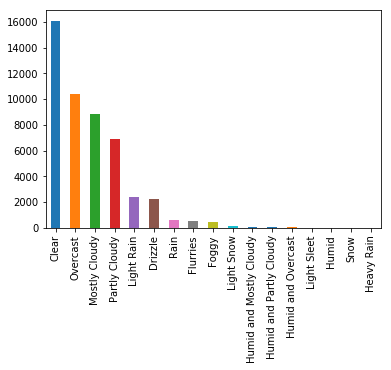

In [26]:
df['current.summary'].value_counts(sort=True, ascending=False, dropna=False).plot.bar()

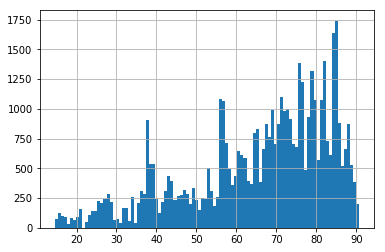

In [27]:
df['daily.temperatureHigh'].hist(bins=100)

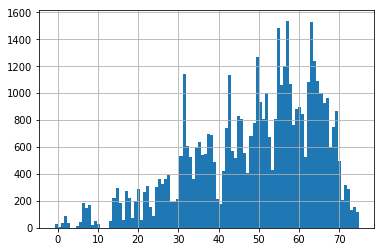

In [28]:
df['daily.temperatureLow'].hist(bins=100)

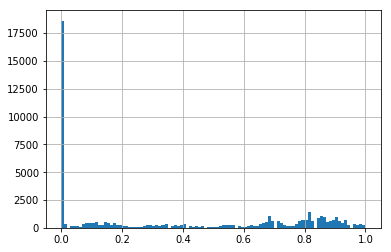

In [29]:
df['daily.precipProbability'].hist(bins=100)

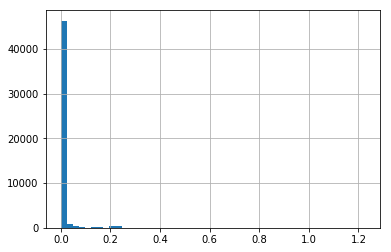

In [30]:
df['daily.precipAccumulation'].hist(bins=50)

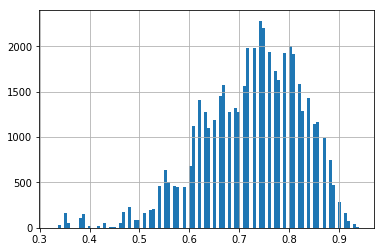

In [31]:
df['daily.humidity'].hist(bins=100)

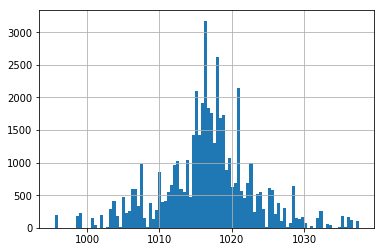

In [32]:
df['daily.pressure'].hist(bins=100)

In [33]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False) 

Potholes                                8689
Weeds/Debris                            7873
Building Maintenance                    4037
Abandoned Vehicle (parked on street)    2572
Litter                                  1886
Refuse Violations                       1802
Illegal Parking                         1770
Missed Pick Up                          1717
Replace/Repair a Sign                   1539
City Source (CDBG)                      1499
Street Light - Repair                   1422
Building Without a Permit               1348
Vacant Building                         1256
Paving Request                          1236
Overgrowth                              1209
Snow/Ice removal                        1033
Pruning (city tree)                     1020
Rodent control                           965
Need Potable Water                       845
Fire Safety System Not Working           818
Dead Animal                              787
Request New Sign                         781
Illegal Du

In [27]:
df['DEPARTMENT'].value_counts(sort=True, ascending=False, dropna=False) 

Permits, Licenses and Inspections       15332
DPW - Street Maintenance                12596
DPW - Refuse                             3519
Police - AVU                             2572
Pittsburgh Water and Sewer Authority     2266
Police - Zones 1-6                       2089
Animal Care & Control                    1752
DOMI - TrafficShop                       1539
City Source Associates, Inc.             1499
Allegheny City Electric                  1422
DOMI - Asphalt                           1236
DOMI - Traffic                           1187
DPW - Forestry Division                  1020
DOMI - Permits                            756
DOMI - Streets                            146
DPW - Park Maintenance                     75
311                                        46
DPW - Transportation & Engineering          1
Name: DEPARTMENT, dtype: int64

In [28]:
df['NEIGHBORHOOD'].value_counts(sort=True, ascending=False, dropna=False) 

Brookline                    2211
Carrick                      2145
South Side Slopes            1799
Squirrel Hill South          1410
South Side Flats             1397
Mount Washington             1329
Beechview                    1236
Hazelwood                    1218
Bloomfield                   1178
Lincoln-Lemington-Belmar     1165
Knoxville                    1056
Central Lawrenceville        1049
Homewood North                998
Greenfield                    998
Garfield                      968
East Liberty                  959
Shadyside                     871
Marshall-Shadeland            866
Homewood South                841
Sheraden                      830
Elliott                       816
Brighton Heights              811
Stanton Heights               764
Perry South                   722
Middle Hill                   721
Perry North                   709
Central Business District     695
Overbrook                     689
Highland Park                 665
Allentown     

In [29]:
request_list = ['Potholes', 'Weeds/Debris', 'Litter', 'Paving Request']

In [18]:
df_holes = df[df['REQUEST_TYPE'] == 'Potholes']
df_weeds = df[df['REQUEST_TYPE'] == 'Weeds/Debris']
df_abandoned = df[df['REQUEST_TYPE'] == 'Abandoned Vehicle (parked on street)']
df_litter = df[df['REQUEST_TYPE'] == 'Litter']
df_paving = df[df['REQUEST_TYPE'] == 'Paving Request']

In [30]:
df_holes.describe()

,REQUEST_ID,STATUS,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,X,Y,...,daily.temperatureMin,daily.temperatureMinTime,daily.time,daily.uvIndex,daily.uvIndexTime,daily.visibility,daily.windBearing,daily.windGust,daily.windGustTime,daily.windSpeed
count,8689.000000,8689.000000,8673.000000,8666.000000,8.689000e+03,8666.000000,8666.000000,8651.000000,8689.000000,8689.000000,...,8689.000000,8.689000e+03,8.689000e+03,8689.000000,8.689000e+03,8689.000000,8689.000000,8689.000000,8.689000e+03,8689.000000
mean,153932.308896,1.006215,5.327453,16.264713,4.200323e+10,3.093123,16.264713,3.849266,-79.965961,40.439207,...,47.220006,1.494673e+09,1.494636e+09,5.342962,1.494680e+09,9.436150,217.105306,10.522265,1.494685e+09,1.868643
std,20687.809021,0.120267,2.503918,8.225085,1.928904e+05,1.396635,8.225085,1.507110,0.046394,0.030330,...,13.730592,7.124810e+06,7.127717e+06,2.349032,7.128216e+06,0.798489,69.721749,5.269455,7.129964e+06,1.367030
min,123276.000000,0.000000,1.000000,0.000000,4.200301e+10,0.000000,0.000000,1.000000,-80.088105,40.363075,...,1.270000,1.483276e+09,1.483247e+09,1.000000,1.483290e+09,4.890000,0.000000,1.470000,1.483250e+09,0.020000
25%,137567.000000,1.000000,3.000000,10.000000,4.200310e+10,2.000000,10.000000,3.000000,-80.002321,40.417890,...,37.640000,1.488946e+09,1.488863e+09,3.000000,1.488902e+09,9.080000,192.000000,6.630000,1.488946e+09,0.850000
50%,148964.000000,1.000000,5.000000,14.000000,4.200317e+10,3.000000,14.000000,4.000000,-79.963775,40.445577,...,46.380000,1.493377e+09,1.493352e+09,5.000000,1.493399e+09,9.820000,223.000000,9.860000,1.493395e+09,1.460000
75%,168486.000000,1.000000,7.000000,20.000000,4.200329e+10,5.000000,20.000000,5.000000,-79.927675,40.463045,...,58.590000,1.499681e+09,1.499659e+09,7.000000,1.499699e+09,10.000000,267.000000,13.040000,1.499717e+09,2.590000
max,205276.000000,3.000000,9.000000,32.000000,4.200398e+10,6.000000,32.000000,6.000000,-79.869143,40.500025,...,73.720000,1.514722e+09,1.514696e+09,10.000000,1.514732e+09,10.000000,359.000000,25.630000,1.514696e+09,5.790000


In [20]:
df_weeds.describe()

,REQUEST_ID,STATUS,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,X,Y,...,daily.temperatureMin,daily.temperatureMinTime,daily.time,daily.uvIndex,daily.uvIndexTime,daily.visibility,daily.windBearing,daily.windGust,daily.windGustTime,daily.windSpeed
count,7873.000000,7873.000000,7863.000000,7865.000000,7.873000e+03,7865.000000,7865.000000,7863.000000,7873.000000,7873.000000,...,7873.000000,7.873000e+03,7.873000e+03,7873.000000,7.873000e+03,7873.000000,7873.000000,7873.000000,7.873000e+03,7873.000000
mean,168907.578941,1.538931,4.456187,17.934139,4.200325e+10,3.177368,17.934139,3.674425,-79.979668,40.436945,...,54.602416,1.499727e+09,1.499692e+09,6.142004,1.499737e+09,9.422660,214.841484,8.210879,1.499743e+09,1.172688
std,18140.530299,0.891918,2.490446,7.774985,1.682691e+05,1.421727,7.774985,1.637706,0.045828,0.026859,...,12.346300,6.179228e+06,6.178942e+06,2.178028,6.178338e+06,0.796446,75.836305,3.912323,6.179492e+06,0.899118
min,123313.000000,0.000000,1.000000,0.000000,4.200301e+10,0.000000,0.000000,1.000000,-80.084271,40.364130,...,2.370000,1.483427e+09,1.483420e+09,1.000000,1.483456e+09,5.710000,0.000000,1.530000,1.483502e+09,0.020000
25%,156163.000000,1.000000,3.000000,13.000000,4.200313e+10,2.000000,13.000000,3.000000,-80.013519,40.416680,...,48.440000,1.495616e+09,1.495598e+09,5.000000,1.495642e+09,9.160000,187.000000,5.120000,1.495660e+09,0.480000
50%,169900.000000,1.000000,4.000000,18.000000,4.200319e+10,3.000000,18.000000,3.000000,-79.983621,40.439190,...,57.960000,1.500008e+09,1.500005e+09,6.000000,1.500052e+09,9.790000,223.000000,7.620000,1.500059e+09,0.990000
75%,182380.000000,3.000000,6.000000,25.000000,4.200330e+10,5.000000,25.000000,5.000000,-79.946651,40.459190,...,63.730000,1.503659e+09,1.503634e+09,8.000000,1.503673e+09,9.990000,259.000000,10.480000,1.503695e+09,1.500000
max,205176.000000,3.000000,9.000000,32.000000,4.200398e+10,6.000000,32.000000,6.000000,-79.867549,40.520177,...,73.950000,1.514542e+09,1.514524e+09,10.000000,1.514560e+09,10.000000,359.000000,25.680000,1.514578e+09,5.650000


# Feature Selection

In [31]:
def label_encode(df, columns):
    for col in columns:
        le = prep.LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed

In [32]:
X = df[['daily.apparentTemperatureHigh', 'daily.apparentTemperatureLow',
       'daily.apparentTemperatureMax',
       'daily.apparentTemperatureMin',
       'daily.cloudCover',
       'daily.dewPoint', 'daily.humidity',
       'daily.precipAccumulation', 'daily.precipIntensity',
       'daily.precipIntensityMax', 
       'daily.precipProbability', 'daily.pressure',
       'daily.temperatureHigh', 
       'daily.temperatureLow', 
       'daily.temperatureMax', 
       'daily.temperatureMin', 
       'daily.uvIndex', 'daily.visibility',
       'daily.windBearing', 'daily.windGust', 
       'daily.windSpeed']]
y = df[['REQUEST_TYPE']]

In [33]:
# as features/target
#all features excluding times
features_all = df[['current.apparentTemperature', 'current.cloudCover', 'current.dewPoint', 'current.humidity',
       'current.icon', 'current.precipIntensity', 'current.precipProbability',
       'current.precipType', 'current.pressure', 'current.summary',
       'current.temperature', 'current.uvIndex',
       'current.visibility', 'current.windBearing', 'current.windGust',
       'current.windSpeed', 'daily.apparentTemperatureHigh',
       'daily.apparentTemperatureLow', 'daily.apparentTemperatureMax',
       'daily.apparentTemperatureMin', 'daily.cloudCover',
       'daily.dewPoint', 'daily.humidity', 'daily.icon', 'daily.moonPhase',
       'daily.precipAccumulation', 'daily.precipIntensity', 'daily.precipIntensityMax', 
       'daily.precipProbability', 'daily.precipType', 'daily.pressure',
       'daily.summary', 'daily.temperatureHigh', 'daily.temperatureLow', 
       'daily.temperatureMax', 'daily.temperatureMin', 'daily.uvIndex', 'daily.visibility',
       'daily.windBearing', 'daily.windGust', 'daily.windSpeed']]

#most highly correlated features
features = df[['current.cloudCover', 'current.humidity',
       'current.icon', 'current.precipProbability',
       'current.precipType', 'current.summary',
       'current.temperature', 'current.uvIndex',
       'daily.apparentTemperatureMin',
       'daily.cloudCover', 'daily.dewPoint', 'daily.humidity',
       'daily.precipAccumulation', 'daily.precipIntensity',
       'daily.precipProbability', 'daily.precipType',  
       'daily.temperatureMin', 'daily.uvIndex', 'daily.windSpeed']]

target = df[['REQUEST_TYPE']]       
label_encode(features_all, features_all.columns.values)
label_encode(features, features.columns.values)
label_encode(target, target.columns.values)

C:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


### Correlations

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features_all, target, test_size = 0.2, random_state = 1)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for current.apparentTemperature is 0.0004270877075908872
The coefficient for current.cloudCover is -0.003694375678669202
The coefficient for current.dewPoint is -0.0005207389492416601
The coefficient for current.humidity is 0.02532543387552259
The coefficient for current.icon is 0.03709762686538905
The coefficient for current.precipIntensity is 0.0014532689697739371
The coefficient for current.precipProbability is -0.012600075931511216
The coefficient for current.precipType is 0.009363301770172569
The coefficient for current.pressure is 1.97973515768025e-05
The coefficient for current.summary is -0.018560998114642707
The coefficient for current.temperature is -9.484823987234928e-05
The coefficient for current.uvIndex is 0.008543484876407742
The coefficient for current.visibility is 0.000511051756568971
The coefficient for current.windBearing is -2.11935377054259e-05
The coefficient for current.windGust is -1.9952986279869432e-05
The coefficient for current.windSpeed is 

In [35]:
#top features
for idx, col_name in enumerate(X_train.columns):
    if abs(regression_model.coef_[0][idx]) > 0.002:
        print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for current.cloudCover is -0.003694375678669202
The coefficient for current.humidity is 0.02532543387552259
The coefficient for current.icon is 0.03709762686538905
The coefficient for current.precipProbability is -0.012600075931511216
The coefficient for current.precipType is 0.009363301770172569
The coefficient for current.summary is -0.018560998114642707
The coefficient for current.uvIndex is 0.008543484876407742
The coefficient for daily.apparentTemperatureMin is -0.003916381334435384
The coefficient for daily.dewPoint is 0.002756916587063215
The coefficient for daily.humidity is -0.05209474823988581
The coefficient for daily.icon is -0.0316182133968844
The coefficient for daily.precipAccumulation is -0.0049919073039914955
The coefficient for daily.precipIntensity is -0.002697575783182908
The coefficient for daily.precipProbability is 0.0021275105798106405
The coefficient for daily.precipType is 0.05391142065598607
The coefficient for daily.temperatureMin is 0.003591

# Linear Regression

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 1)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
y_pred = regression_model.predict(X_test)
rmse = mean_squared_error(y_pred, y_test)
regression_model.score(X_test, y_test),  rmse, math.sqrt(rmse)

(0.006501944836665663, 66.86610226515867, 8.177169575419033)

In [40]:
confusion = confusion_matrix(y_test, y_pred.round())
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
false_positive_rate = FP / float(TN + FP)
precision = TP / float(TP + FP)

print ("sensitivity: " + str(sensitivity) + 
       "\nspecificity: " + str(specificity) + 
       "\nfalse positive rate: " + str(false_positive_rate) + 
       "\nprecision: " + str(precision))

sensitivity: nan
specificity: nan
false positive rate: nan
precision: nan


C:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  
C:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


# NB

In [41]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 1)
nb = GaussianNB()
nb.fit(X_train, y_train)

C:\dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
y_pred = nb.predict(X_test)
y_pred

array([15, 21, 13, ...,  4,  4, 24], dtype=int64)

In [43]:
accuracy_score(y_test, y_pred, normalize=True)

0.12465599836917746

In [44]:
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
false_positive_rate = FP / float(TN + FP)
precision = TP / float(TP + FP)

print ("sensitivity: " + str(sensitivity) + 
       "\nspecificity: " + str(specificity) + 
       "\nfalse positive rate: " + str(false_positive_rate) + 
       "\nprecision: " + str(precision))

sensitivity: nan
specificity: nan
false positive rate: nan
precision: nan


C:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  
C:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


# KNN

In [45]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 1)
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

In [46]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred.round(), normalize=False) / len(y_test.index)

0.07889104066863724

In [47]:
confusion = confusion_matrix(y_test, y_pred.round())
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
false_positive_rate = FP / float(TN + FP)
precision = TP / float(TP + FP)

print ("sensitivity: " + str(sensitivity) + 
       "\nspecificity: " + str(specificity) + 
       "\nfalse positive rate: " + str(false_positive_rate) + 
       "\nprecision: " + str(precision))

sensitivity: 0.975609756097561
specificity: 1.0
false positive rate: 0.0
precision: 1.0


# SVM (Runs forever)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 1)
model = svm.SVC() 
model.fit(X_train, y_train)

C:\dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
false_positive_rate = FP / float(TN + FP)
precision = TP / float(TP + FP)

print ("sensitivity: " + str(sensitivity) + 
       "\nspecificity: " + str(specificity) + 
       "\nfalse positive rate: " + str(false_positive_rate) + 
       "\nprecision: " + str(precision))